# Part 1 ANN

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd


In [3]:
def load_dataset():
    data=pd.read_csv('BankNote_Authentication.csv')
    data = data.sample(frac=1).reset_index(drop=True) 
    data.head(5)
    train_df = data[0:1000].reset_index(drop=True)
    test_df = data[1000::].reset_index(drop=True)
    train_Y =train_df['class'].reset_index(drop=True)
    train_X = train_df.loc[:, train_df.columns != 'class']
    test_Y =test_df['class'].reset_index(drop=True)
    test_X = test_df.loc[:, test_df.columns != 'class']
    
    train_x = np.array(train_X) 
    train_y = np.array(train_Y)
    
    test_x = np.array(test_X) 
    test_y = np.array(test_Y)
    classes = np.array([0,1]) 
    
    train_y = train_y.reshape((1, train_y.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))
    
    return train_x, train_y, test_x, test_y, classes

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [5]:
def initialize_parameters(dim):
    w = np.random.randn(dim, 1)*0.01
    b = 0
    return w, b

In [6]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    #calculate activation function
    A = sigmoid(np.dot(w.T, X)+b)
    #find the cost
    cost = (-1/m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  
    #find gradient (back propagation)
    dw = (1/m) * np.dot(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y)
    cost = np.squeeze(cost)
    grads = {"dw": dw,
             "db": db} 
    return grads, cost

In [7]:
def gradient_descent(w, b, X, Y, iterations, learning_rate):
    costs = []
    for i in range(iterations):
        grads, cost = propagate(w, b, X, Y)
        
        #update parameters
        w = w - learning_rate * grads["dw"]
        b = b - learning_rate * grads["db"]
        costs.append(cost)
        if i % 500 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}    
    return params, costs

In [8]:
def predict(w, b, X):    
    # number of example
    m = X.shape[1]
    y_pred = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X)+b)
    
    for i in range(A.shape[1]):
        y_pred[0,i] = 1 if A[0,i] >0.5 else 0 
        pass
    return y_pred

In [9]:
def model(train_x, train_y, test_x, test_y, iterations, learning_rate):
    w, b = initialize_parameters(train_x.shape[0])
    parameters, costs = gradient_descent(w, b, train_x, train_y, iterations, learning_rate)
    
    w = parameters["w"]
    b = parameters["b"]
    
    # predict 
    train_pred_y = predict(w, b, train_x)
    test_pred_y = predict(w, b, test_x)
    print("Train Acc: {} %".format(100 - np.mean(np.abs(train_pred_y - train_y)) * 100))
    print("Test Acc: {} %".format(100 - np.mean(np.abs(test_pred_y - test_y)) * 100))
    
    return costs

In [10]:
train_x, train_y, test_x, test_y, classes =load_dataset()

In [11]:
train_x = train_x.reshape(train_x.shape[0], -1).T
test_x = test_x.reshape(test_x.shape[0], -1).T

In [12]:
costs = model(train_x, train_y, test_x, test_y, iterations = 2000, learning_rate = 0.005)

Cost after iteration 0: 0.684981
Cost after iteration 500: 0.177783
Cost after iteration 1000: 0.134910
Cost after iteration 1500: 0.114506
Train Acc: 97.4 %
Test Acc: 96.7741935483871 %


# Learning Rate

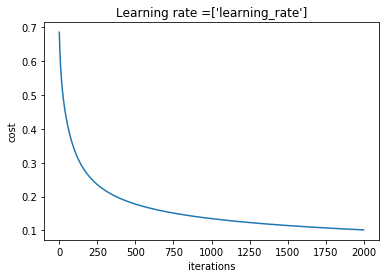

In [13]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(["learning_rate"]))
plt.show()